In [265]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
GT = pd.read_csv('GlobalTemperatures.csv')
GTCity = pd.read_csv('GlobalLandTemperaturesByCity.csv')
GTCountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
GTMCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
GTState = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [267]:
GT.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
GT.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


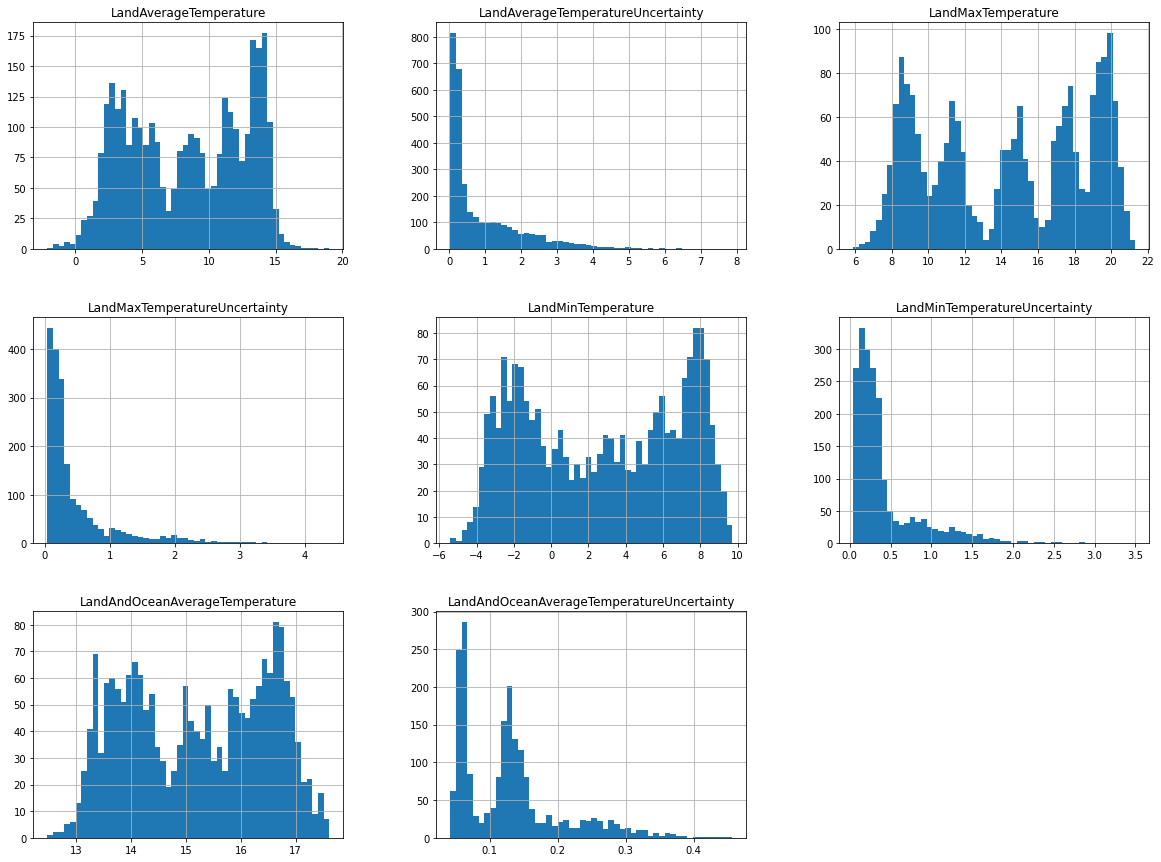

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
GT.hist(bins = 50,figsize=(20,15))
plt.show()

In [270]:
GTOcean = GT[['dt','LandAndOceanAverageTemperature']]

In [271]:
GTOcean.dropna(axis = 0, inplace = True)

<ipython-input-271-2c7fc661df19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GTOcean.dropna(axis = 0, inplace = True)


In [272]:
Years = np.unique(GTOcean['dt'].apply(lambda x:x[:4]))

In [273]:
GTOcean_mod = []
GT_DF = pd.DataFrame()
for i in Years:
    mean_GT = np.array(GTOcean.loc[GTOcean['dt'].str.contains(i)].mean())
    np.reshape(mean_GT,(1))
    print(mean_GT)
    GT_dict = {'Year' : i,'LandAndOceanAverageTemperature' : mean_GT}
    GT_DF = GT_DF.append(GT_dict,ignore_index = True)


[14.86716667]
[14.99183333]
[15.0065]
[14.95516667]
[14.991]
[15.02108333]
[14.87933333]
[14.75825]
[14.8815]
[14.92991667]
[14.88291667]
[14.80066667]
[14.74008333]
[14.93575]
[14.8965]
[14.99666667]
[15.057]
[15.05866667]
[15.09691667]
[15.0655]
[15.00433333]
[15.00591667]
[15.01933333]
[15.04925]
[14.957]
[14.92191667]
[14.90941667]
[15.28266667]
[15.35741667]
[15.06441667]
[15.00866667]
[15.08716667]
[15.05658333]
[14.96325]
[14.83325]
[14.85441667]
[14.83525]
[14.816]
[14.99408333]
[15.11341667]
[14.84075]
[14.94383333]
[14.8825]
[14.91225]
[14.91475]
[14.969]
[15.09058333]
[15.07533333]
[14.88691667]
[15.04833333]
[15.14391667]
[15.07333333]
[14.95833333]
[14.83658333]
[14.81041667]
[14.95466667]
[15.03191667]
[14.87483333]
[14.83816667]
[14.79033333]
[14.81908333]
[14.776]
[14.87716667]
[14.90875]
[15.07625]
[15.14375]
[14.90133333]
[14.80975]
[14.95983333]
[15.00675]
[15.02625]
[15.10208333]
[15.01233333]
[15.02783333]
[15.03933333]
[15.09033333]
[15.24108333]
[15.12225]
[15.13

In [274]:
GT_DF.head()

,LandAndOceanAverageTemperature,Year
0,[14.867166666666668],1850
1,[14.991833333333332],1851
2,[15.006500000000003],1852
3,[14.955166666666669],1853
4,[14.990999999999998],1854


In [275]:
x = np.array(GT_DF['Year'])
y = np.array(GT_DF['LandAndOceanAverageTemperature'])


Text(0.5, 1.0, 'Change in Ocean Temperature')

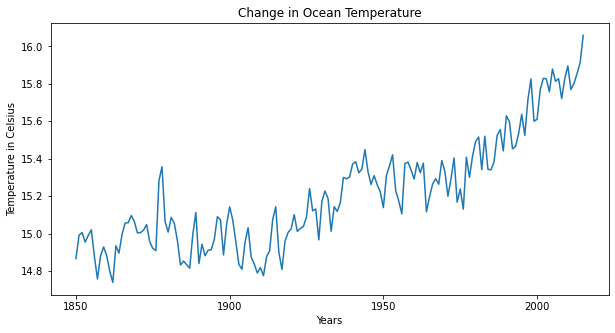

In [417]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(np.arange(0,len(x),50))
plt.xlabel('Years')
plt.ylabel('Temperature in Celsius')
plt.title('Change in Ocean Temperature')

In [277]:
GTMCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [278]:
GTMCity_Aus = GTMCity.loc[GTMCity['Country'] == 'Australia']

In [279]:
GTMCity.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [316]:
GTMCity_Brazil = GTMCity.loc[GTMCity['Country'] == 'Brazil']
GTMCity_Brazil = GTMCity_Brazil.loc[GTMCity_Brazil['City'] == 'Brasília']
GTMCity_India = GTMCity.loc[GTMCity['Country'] == 'India']
GTMCity_India = GTMCity_India.loc[GTMCity_India['City'] == 'Bombay']
GTMCity_USA = GTMCity.loc[GTMCity['Country'] == 'United States']
GTMCity_USA = GTMCity_USA.loc[GTMCity_USA['City'] == 'New York']
GTMCity_SA = GTMCity.loc[GTMCity['Country'] == 'South Africa']
GTMCity_SA = GTMCity_SA.loc[GTMCity_SA['City'] == 'Cape Town']
GTMCity_Aus = GTMCity.loc[GTMCity['Country'] == 'Australia']
GTMCity_Aus = GTMCity_Aus.loc[GTMCity_Aus['City'] == 'Sydney']

In [413]:
GTMCity_Brazil['Year'] = pd.DatetimeIndex(GTMCity_Brazil['dt']).year
GTMCity_India['Year'] = pd.DatetimeIndex(GTMCity_India['dt']).year
GTMCity_USA['Year'] = pd.DatetimeIndex(GTMCity_USA['dt']).year
GTMCity_SA['Year'] = pd.DatetimeIndex(GTMCity_SA['dt']).year
GTMCity_Aus['Year'] = pd.DatetimeIndex(GTMCity_Aus['dt']).year

In [415]:
GTMCity_Brazil.drop(columns = cols,inplace = True)
GTMCity_India.drop(columns = cols,inplace = True)
GTMCity_USA.drop(columns = cols,inplace = True)
GTMCity_SA.drop(columns = cols,inplace = True)
GTMCity_Aus.drop(columns = cols,inplace = True)

,AverageTemperature,City,Country,Year
32629,21.873,Brasília,Brazil,1832
32630,21.974,Brasília,Brazil,1832
32631,21.731,Brasília,Brazil,1832
32632,20.957,Brasília,Brazil,1832
32633,20.121,Brasília,Brazil,1832


In [369]:
Frames = [GTMCity_Brazil,GTMCity_India,GTMCity_USA,GTMCity_SA,GTMCity_Aus]
GTMCity_Combined = pd.concat(Frames)

In [319]:
GTMCity_Combined['City'].unique()

array(['Brasília', 'Bombay', 'New York', 'Cape Town', 'Sydney'],
      dtype=object)

In [321]:
GTMCity_Combined.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
32629,1832-01-01,21.873,1.604,Brasília,Brazil,15.27S,47.50W
32630,1832-02-01,21.974,2.693,Brasília,Brazil,15.27S,47.50W
32631,1832-03-01,21.731,1.639,Brasília,Brazil,15.27S,47.50W
32632,1832-04-01,20.957,2.352,Brasília,Brazil,15.27S,47.50W
32633,1832-05-01,20.121,2.016,Brasília,Brazil,15.27S,47.50W


In [371]:
GTMCity_Combined['Year'] = pd.DatetimeIndex(GTMCity_Combined['dt']).year

In [377]:
cols = ['AverageTemperatureUncertainty']
GTMCity_Combined.drop(columns = cols,inplace = True)

In [374]:
cols = list(GTMCity_Combined.columns.values)
GTMCity_Combined = GTMCity_Combined[cols[4:5] + cols[2:4] + cols[0:2]]

In [378]:
GTMCity_Combined.head()

,Year,City,Country,AverageTemperature
32629,1832,Brasília,Brazil,21.873
32630,1832,Brasília,Brazil,21.974
32631,1832,Brasília,Brazil,21.731
32632,1832,Brasília,Brazil,20.957
32633,1832,Brasília,Brazil,20.121


In [386]:
Years = list(str(GTMCity_Combined['Year'].unique()))

In [408]:
mean_year = GTMCity_Combined.loc[GTMCity_Combined['Year'] == 1796]

In [409]:
mean_year

,Year,City,Country,AverageTemperature
30016,1796,Bombay,India,24.317
30017,1796,Bombay,India,23.923
30018,1796,Bombay,India,24.407
30019,1796,Bombay,India,27.171
30020,1796,Bombay,India,29.050
30021,1796,Bombay,India,28.539
30022,1796,Bombay,India,26.857
30023,1796,Bombay,India,26.887
30024,1796,Bombay,India,27.123
30025,1796,Bombay,India,27.562
